In [1]:
DATASET = 'bdsaglam/musique'

## Inspect

In [2]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
EXP_DIR = Path("./exps")
df = pd.DataFrame([json.loads(fp.read_text()) for fp in EXP_DIR.glob("*.json")])
df = df[df['params.dataset.path'] == DATASET].reset_index(drop=True)
len(df)

35

In [4]:
df['params.model.path'].unique()

array(['bdsaglam/Llama-3.1-8B-Instruct-ragent-grpo-20250526_110630',
       'bdsaglam/Llama-3.1-8B-Instruct-ragent-grpo-20250520_080809-merged',
       'bdsaglam/Llama-3.1-8B-Instruct-ragent-grpo-20250531_141657',
       '/home/baris/repos/verifiers/outputs/Qwen2.5-14B-Instruct-ragent-grpo-20250530_155020-merged',
       'bdsaglam/Llama-3.1-8B-Instruct-ragent-grpo-20250508_213215-merged',
       'Qwen/Qwen2.5-14B-Instruct',
       'bdsaglam/Llama-3.1-8B-Instruct-ragent-grpo-musique-merged',
       '/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-grpo-20250531_141657',
       'Qwen/Qwen2.5-7B-Instruct', 'Qwen/Qwen3-32B',
       'deepseek-ai/DeepSeek-R1-0528-Qwen3-8B',
       '/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-grpo-20250602_094840-merged',
       'Qwen/Qwen2.5-32B-Instruct', 'meta-llama/Llama-3.1-8B-Instruct',
       'meta-llama/Llama-3.1-70B-Instruct'], dtype=object)

In [5]:
model_name_mapping = {
    "bdsaglam/Qwen2.5-1.5B-Instruct-ragent-musique": "Qwen2.5-1.5B-Instruct-ragent",
    "bdsaglam/Llama-3.1-8B-Instruct-ragent-grpo-musique-merged": "Llama-3.1-8B-Instruct-ragent",
}
def map_model_name(x):
    return model_name_mapping.get(x, x.rsplit('/', 1)[-1]).replace("-Instruct", "")

df['params.model.name'] = df['params.model.path'].map(map_model_name)

In [6]:
df['params.fine_tuning'] = df['params.model.name'].map(lambda x: 'GRPO' if 'ragent' in x else 'None')
df['params.model.base'] = df['params.model.name'].map(lambda x: x.rsplit('-ragent')[0])
# extract the model size from the model name, e.g. Qwen/Qwen2.5-1.5B-Instruct -> 1.5B
df['params.model.size'] = df['params.model.name'].str.extract(r'-([0-9.]+)B').map(float)

In [7]:
target_params = [
    "params.dataset.path",
    "params.model.name",
    "params.model.size",
    "params.model.few_shot_prob",
    "params.fine_tuning",
    "params.repeat",
    # "params.retriever.name",
    # "params.retriever.top_k",
    # "params.retriever.mode",
]

In [8]:
df.columns

Index(['commit', 'id', 'name', 'params.dataset.path', 'params.dataset.name',
       'params.dataset.split', 'params.model.path', 'params.model.temperature',
       'params.model.top_p', 'params.model.few_shot_prob',
       'params.retriever.name', 'params.retriever.top_k',
       'params.retriever.mode', 'params.repeat', 'params.run',
       'metrics.exact_match', 'metrics.f1', 'metrics.supporting.precision',
       'metrics.supporting.recall', 'metrics.supporting.f1',
       'metrics.citation.precision', 'metrics.citation.recall',
       'metrics.citation.f1', 'params.agent', 'params.devices',
       'params.model.name', 'params.fine_tuning', 'params.model.base',
       'params.model.size'],
      dtype='object')

In [9]:
leaderboard_df = df[
    [
        "name",
        *target_params,
        "metrics.exact_match",
        "metrics.f1",
        "metrics.supporting.f1",
        "metrics.supporting.recall",
        "metrics.supporting.precision",
        "metrics.citation.f1",
        "metrics.citation.recall",
        "metrics.citation.precision",
    ]
].sort_values(by="metrics.f1", ascending=False)


In [10]:
leaderboard_df.loc[df['params.repeat'] == 1].drop(columns=['name', 'params.repeat'])

,params.dataset.path,params.model.name,params.model.size,params.model.few_shot_prob,params.fine_tuning,metrics.exact_match,metrics.f1,metrics.supporting.f1,metrics.supporting.recall,metrics.supporting.precision,metrics.citation.f1,metrics.citation.recall,metrics.citation.precision
26,bdsaglam/musique,Llama-3.1-8B-ragent,8.0,1.0,GRPO,0.400910,0.520757,0.750527,0.704661,0.838933,0.050443,0.040546,0.076886
5,bdsaglam/musique,Llama-3.1-8B-ragent-grpo-20250508_213215-merged,8.0,0.0,GRPO,0.375672,0.477141,0.780129,0.757413,0.831527,0.625031,0.599331,0.675252
3,bdsaglam/musique,Qwen2.5-14B-ragent-grpo-20250530_155020-merged,14.0,1.0,GRPO,0.334299,0.446798,0.733804,0.691870,0.826948,0.129863,0.112950,0.168466
34,bdsaglam/musique,Llama-3.1-8B-ragent-grpo-20250602_094840-merged,8.0,1.0,GRPO,0.317336,0.430284,0.715235,0.661392,0.821059,0.600134,0.526514,0.771082
21,bdsaglam/musique,Qwen2.5-14B-ragent-grpo-20250530_155020-merged,14.0,0.0,GRPO,0.309061,0.416391,0.757376,0.732382,0.821156,0.319966,0.292546,0.378465
17,bdsaglam/musique,Llama-3.1-8B-ragent-grpo-20250602_094840-merged,8.0,0.0,GRPO,0.308647,0.408005,0.710366,0.657530,0.811123,0.573394,0.492070,0.764922
16,bdsaglam/musique,Llama-3.1-8B-ragent,8.0,0.0,GRPO,0.281341,0.405899,0.700019,0.646187,0.811295,0.228762,0.190181,0.322128
1,bdsaglam/musique,Llama-3.1-8B-ragent-grpo-20250520_080809-merged,8.0,0.0,GRPO,0.290856,0.366749,0.728589,0.678079,0.841629,0.460290,0.446973,0.486967
22,bdsaglam/musique,Llama-3.1-8B,8.0,1.0,None,0.233347,0.341698,0.733038,0.688215,0.826796,0.184292,0.151945,0.263688
31,bdsaglam/musique,Llama-3.1-70B,70.0,0.0,None,0.215970,0.338994,0.768041,0.742484,0.833133,0.581173,0.554406,0.636050


In [11]:
leaderboard_df.loc[df['params.repeat'] == 5].drop(columns=['name', 'params.repeat'])

,params.dataset.path,params.model.name,params.model.size,params.model.few_shot_prob,params.fine_tuning,metrics.exact_match,metrics.f1,metrics.supporting.f1,metrics.supporting.recall,metrics.supporting.precision,metrics.citation.f1,metrics.citation.recall,metrics.citation.precision
20,bdsaglam/musique,Llama-3.1-8B-ragent-grpo-20250508_213215-merged,8.0,0.0,GRPO,0.480761,0.597602,0.810444,0.792546,0.849110,0.722801,0.689698,0.785450
4,bdsaglam/musique,Llama-3.1-8B-ragent-grpo-20250520_080809-merged,8.0,0.0,GRPO,0.426976,0.538753,0.805215,0.774479,0.869866,0.672131,0.651152,0.711667
7,bdsaglam/musique,Llama-3.1-8B-ragent,8.0,0.0,GRPO,0.373604,0.499755,0.719008,0.665425,0.829589,0.227975,0.188009,0.326410
6,bdsaglam/musique,Qwen2.5-14B,14.0,0.0,None,0.290443,0.403459,0.754856,0.721487,0.831037,0.144846,0.129879,0.176355
0,bdsaglam/musique,Llama-3.1-8B-ragent-grpo-20250526_110630,8.0,0.0,GRPO,0.290000,0.389241,0.678325,0.616944,0.801167,0.211833,0.174167,0.312500
27,bdsaglam/musique,Llama-3.1-8B,8.0,0.0,None,0.215970,0.342714,0.726457,0.681147,0.822114,0.263024,0.217798,0.373121
15,bdsaglam/musique,Qwen2.5-7B,7.0,0.0,None,0.043029,0.166037,0.698591,0.634981,0.828382,0.495934,0.385981,0.763298


In [12]:
def scatter_plot(df):
    # Create publication-quality plot comparing model size vs F1 score
    plt.style.use("seaborn-v0_8")  # Use the updated seaborn style name
    plt.figure(figsize=(12, 6))

    # Customize appearance
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.xlabel("Model Size (Billion Parameters)", fontsize=12)
    plt.ylabel("F1 Score", fontsize=12)
    plt.title("Model Performance vs Size", fontsize=14, pad=15)

    # Add fine-tuning type as color
    colors = {"None": "C0", "GRPO": "C1"}
    for fine_tuning in colors:
        mask = df["params.fine_tuning"] == fine_tuning

        # Plot points
        plt.scatter(
            df[mask]["params.model.size"],
            df[mask]["metrics.f1"],
            label=fine_tuning if fine_tuning != "None" else "Base Model",
            alpha=0.7,
            s=100,
            c=colors[fine_tuning],
        )

        # Add model names as annotations
        for idx in df[mask].index:
            model_name = df.loc[idx, "params.model.base"] + "-" + df.loc[idx, "params.retriever.name"]
            plt.annotate(
                model_name,
                (df.loc[idx, "params.model.size"], df.loc[idx, "metrics.f1"]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=8,
            )

    plt.legend(title="Fine-tuning Type", title_fontsize=10)

    # Adjust layout and style
    plt.tight_layout()
    plt.show()


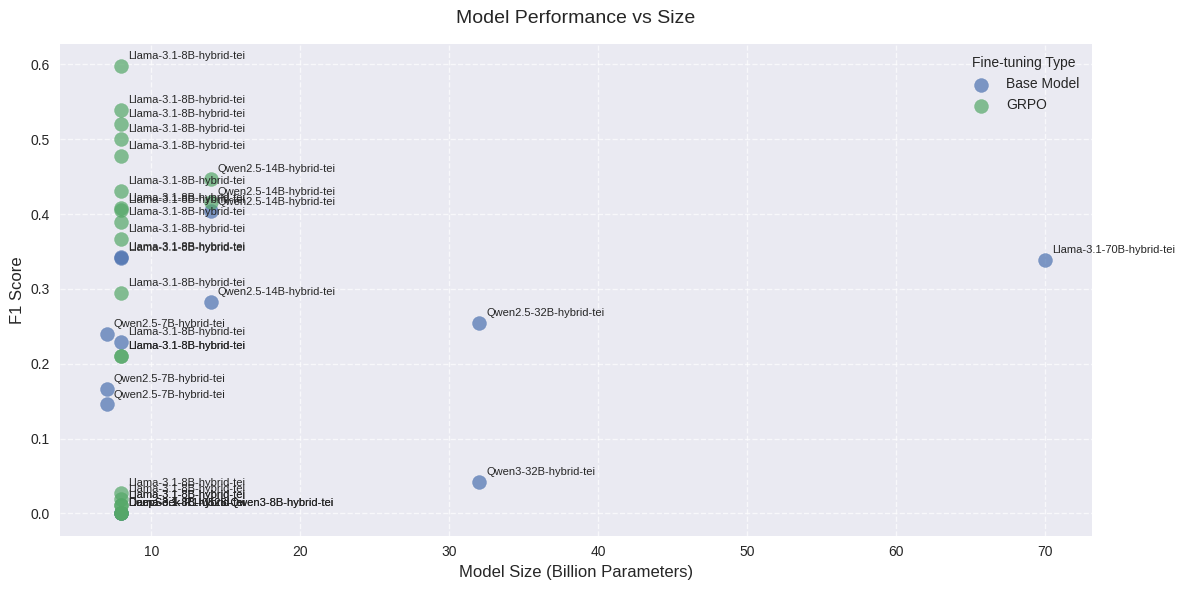

In [13]:
scatter_plot(df)

In [14]:
# mask = df['params.dataset.path'] == 'bdsaglam/hotpotqa-distractor'
# scatter_plot(df[mask])

In [15]:
def plot_model_size_vs_f1(df):
    """Create a publication-quality scatter plot comparing model size vs F1 score."""
    # Set style and figure size
    plt.style.use("seaborn-v0_8-whitegrid")
    fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

    # Customize appearance
    ax.grid(True, linestyle="--", alpha=0.4, zorder=0)
    ax.set_xlabel("Model Size (Billion Parameters)", fontsize=12, fontweight="bold")
    ax.set_ylabel("F1 Score", fontsize=12, fontweight="bold")
    ax.set_title("Language Model Performance by Parameter Count", fontsize=14, pad=15, fontweight="bold")

    # Set x-axis to logarithmic scale
    ax.set_xscale('log')

    # Define colors and markers
    colors = {"None": "#2E86C1", "GRPO": "#E74C3C"}
    markers = {"None": "o", "GRPO": "^"}

    for fine_tuning in ["None", "GRPO"]:
        mask = df["params.fine_tuning"] == fine_tuning
        label = "Base Model" if fine_tuning == "None" else "GRPO Fine-tuned"

        # Plot points
        ax.scatter(
            df[mask]["params.model.size"],
            df[mask]["metrics.f1"],
            label=label,
            alpha=0.9,
            s=120,
            c=colors[fine_tuning],
            marker=markers[fine_tuning],
            edgecolor="white",
            linewidth=1,
            zorder=2,
        )

        # Add model name annotations
        for idx in df[mask].index:
            label = df.loc[idx, "params.model.base"].replace("Instruct", "").strip("-")
            label += f" (x{df.loc[idx, 'params.repeat']})"
            plt.annotate(
                label,
                (df.loc[idx, "params.model.size"], df.loc[idx, "metrics.f1"]),
                xytext=(7, 7),
                textcoords="offset points",
                fontsize=9,
                alpha=0.8,
                bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=1),
            )

    # Customize legend
    ax.legend(title="Model Type", title_fontsize=10, fontsize=10, framealpha=0.9, edgecolor="none", loc="upper left")

    # Set axis limits with padding
    ax.set_xlim(left=1)  # Start at 1B parameters since using log scale
    ax.set_ylim(bottom=0)

    # Format axis ticks
    ax.tick_params(axis="both", which="major", labelsize=10)

    plt.tight_layout()
    plt.show()


In [16]:
def aggregate_best_models(df, by: list[str] = ["params.model.base", "params.fine_tuning", "params.repeat"]):
    # Group by model base and fine tuning method
    grouped = df.groupby(by)

    # Get columns of interest
    columns = [
        "params.model.base",
        "params.model.size",
        "params.model.few_shot_prob",
        "params.fine_tuning",
        "params.retriever.name",
        "params.retriever.top_k",
        "params.repeat",
        "metrics.exact_match",
        "metrics.f1",
        "metrics.supporting.recall",
        "metrics.supporting.f1",
    ]

    # For each group, select the row with highest F1 score
    return (
        grouped.apply(lambda x: x.loc[x["metrics.f1"].idxmax()])[columns]
        .reset_index(drop=True)
        .sort_values(by="metrics.f1", ascending=False)
    )

In [17]:
best_df = aggregate_best_models(df.loc)
plot_model_size_vs_f1(best_df)
display(best_df)

AttributeError: '_LocIndexer' object has no attribute 'groupby'